In [2]:
from importlib import reload
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [146]:
reload(matutils)

<module 'matgen.matutils' from 'C:\\Users\\Oleg\\Documents\\GitHub\\Voronoi_DCC_Analyser\\matgen\\matutils.py'>

In [3]:
from matgen import base, matutils

In [1]:
def get_p(a):
    return round((a < 15).sum() / len(a), 3), round((a >= 15).sum() / len(a), 3)

## Settings

In [7]:
bins = np.linspace(0, 64, 33) # 32 bins
# bins = [0, 15, 63] # 2 bins

In [4]:
max_order = 20

In [8]:
figsize = [8, 6]
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = figsize

## Random

In [10]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass4/disangles/disangles1.txt'
random_distr = np.loadtxt(filename)

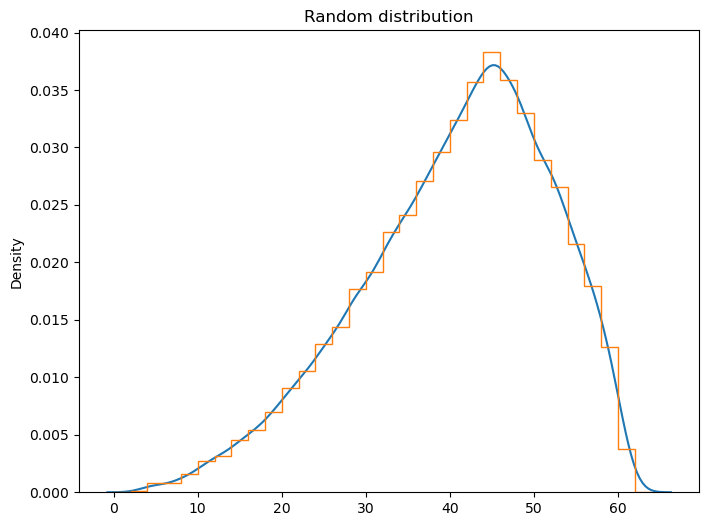

In [11]:
ax = sns.kdeplot(random_distr)
ax.hist(random_distr, bins=bins, histtype='step', density=True)
ax.set_title('Random distribution')
plt.show()

In [12]:
Q_random, _ = np.histogram(random_distr, bins=bins)
Q_random = Q_random / Q_random.sum()

In [33]:
data = []

In [34]:
columns = [
    'alloy',
    'processing_type',
    'processing_stage',
    'number_of_cells',
    'neighbor_order',
    'number_of_disangles',
    'p',
    'H']

## ECAP2022/Cu_01Cr_01Zr

### pass1

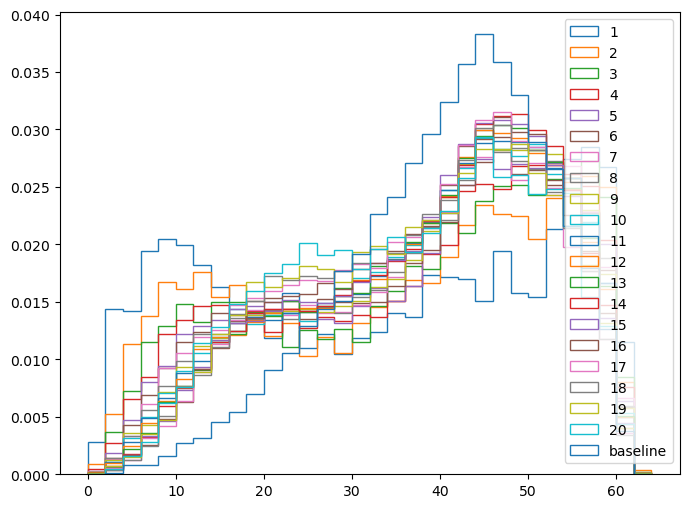

In [19]:
alloy = 'Cu_01Cr_01Zr'
processing_type = 'ECAP'
processing_stage = 1
number_of_cells = 992

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [35]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

In [24]:
import pandas as pd

In [54]:
df = pd.DataFrame(data, columns=columns)
df

,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183
...,...,...,...,...,...,...,...,...
75,Cu_01Cr_01Zr,ECAP,8,3932,16,235143,0.025,0.018
76,Cu_01Cr_01Zr,ECAP,8,3932,17,241868,0.026,0.017
77,Cu_01Cr_01Zr,ECAP,8,3932,18,247645,0.025,0.017
78,Cu_01Cr_01Zr,ECAP,8,3932,19,252254,0.026,0.019


<AxesSubplot:xlabel='p', ylabel='H'>

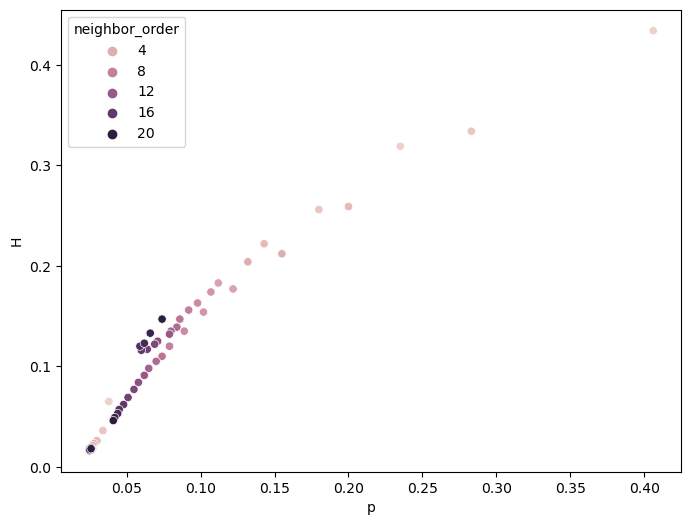

In [68]:
sns.scatterplot(data=df, x='p', y='H', hue='neighbor_order')

### pass4

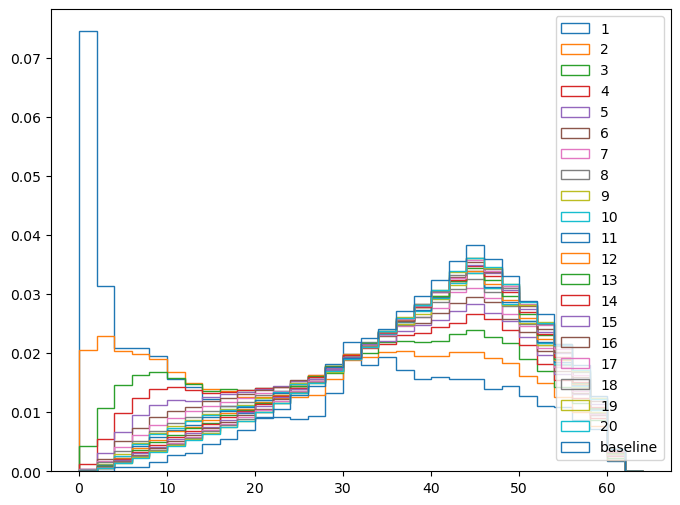

In [39]:
alloy = 'Cu_01Cr_01Zr'
processing_type = 'ECAP'
processing_stage = 4
number_of_cells = 10283

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [40]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass8

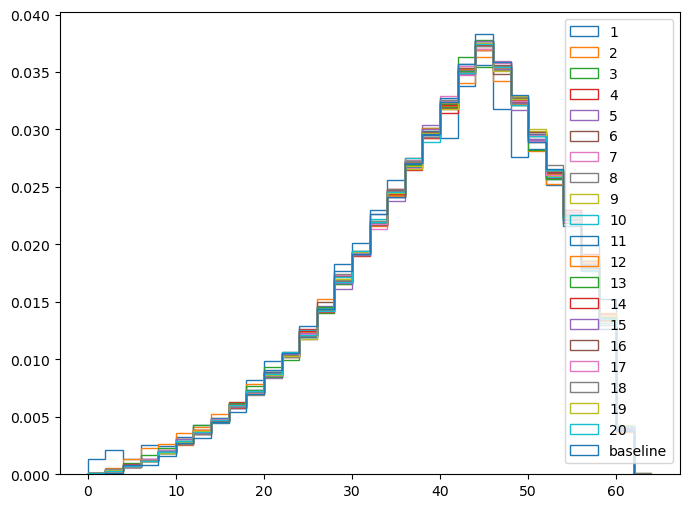

In [52]:
alloy = 'Cu_01Cr_01Zr'
processing_type = 'ECAP'
processing_stage = 8
number_of_cells = 3932

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [53]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

## ECAP2022/Cu_01Cr_01Zr RANDOM

### pass1

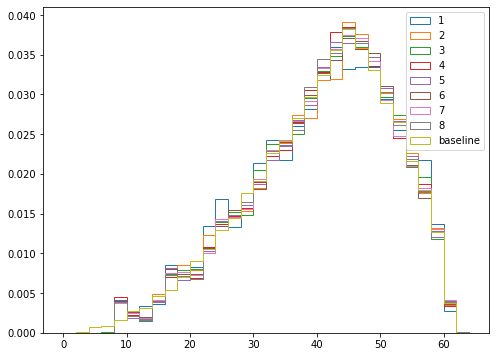

In [159]:
title = 'ECAP2022/Cu_01Cr_01Zr/pass1 RANDOM'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr\\Neper_RandomOri_Cu-0.1Cr-0.1Zr\pass1\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [160]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 2858 0.0003708425306445662 True
2 6598 8.174004320071759e-07 True
3 11163 2.19824158875781e-14 True
4 15992 0.0 True
5 20647 0.0 True
6 24713 0.0 True
7 27827 0.0 True
8 30327 0.0 True


In [148]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance1 = distance

1 0.063
2 0.051
3 0.053
4 0.054
5 0.054
6 0.053
7 0.054
8 0.052


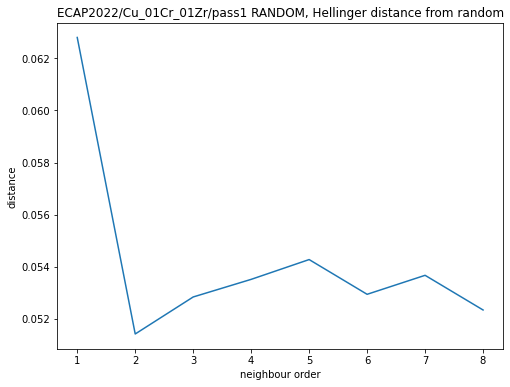

In [102]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass4

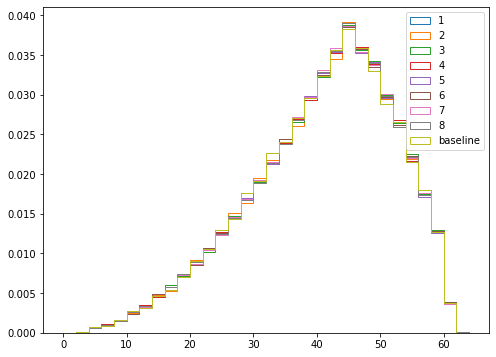

In [149]:
title = 'ECAP2022/Cu_01Cr_01Zr/pass4 RANDOM'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr\\Neper_RandomOri_Cu-0.1Cr-0.1Zr\pass4\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [150]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, pvalue, pvalue < 0.001)

Is difference from random significant?
1 1.0 False
2 0.7531222590442375 False
3 0.5303886987820838 False
4 0.803100324277569 False
5 0.6649522973619432 False
6 0.5090225707461886 False
7 0.5772077592918782 False
8 0.6910559584488735 False


In [151]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance4 = distance

1 0.0
2 0.012
3 0.013
4 0.011
5 0.011
6 0.012
7 0.011
8 0.011


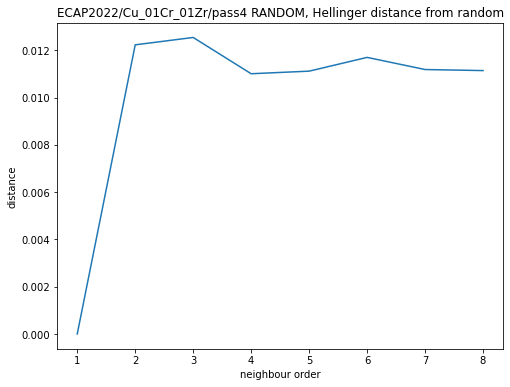

In [152]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass8

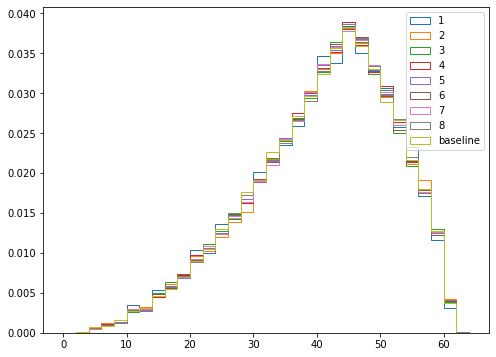

In [153]:
title = 'ECAP2022/Cu_01Cr_01Zr/pass8 RANDOM'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr\\Neper_RandomOri_Cu-0.1Cr-0.1Zr\pass8\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [158]:
len(random_distr)

30537

In [157]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 11579 0.21689788164660972 False
2 26026 0.0795595356596841 False
3 43310 0.26921080431134925 False
4 61734 0.07678039513690749 False
5 80651 0.07480507477372977 False
6 99614 0.015494040900079442 False
7 117878 0.001782903991186524 False
8 135354 0.0036382932729177586 False


In [155]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance8 = distance

1 0.025
2 0.021
3 0.017
4 0.017
5 0.016
6 0.016
7 0.017
8 0.015


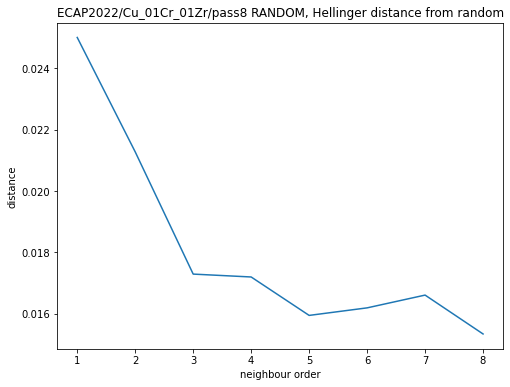

In [156]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

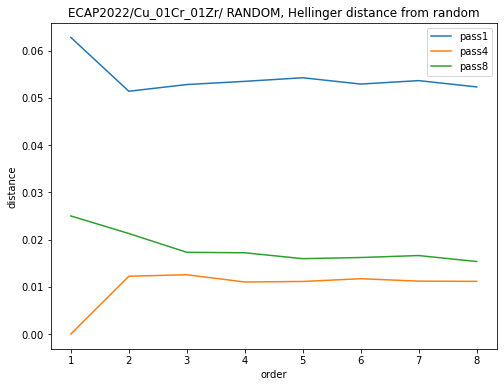

In [161]:
plt.plot(x, distance1, label='pass1')
plt.plot(x, distance4, label='pass4')
plt.plot(x, distance8, label='pass8')
plt.title('ECAP2022/Cu_01Cr_01Zr/ RANDOM' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

## ECAP2022/Cu_01Cr_01Zr_005Y

### pass1

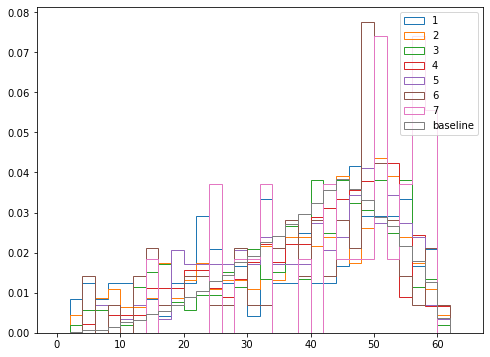

In [164]:
title = 'ECAP2022/Cu_01Cr_01Zr_005Y/pass1'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr_005Y\\Neper_Cu_01Cr_01Zr_005Y\pass1\disangles'

max_order = 7

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [165]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 120 0.0 True
2 230 0.0 True
3 262 1.2734876486675262e-09 True
4 225 0.4662464912800077 False
5 146 0.08030642109737574 False
6 71 0.00010867948914417003 True
7 27 0.23643453356831645 False


In [166]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance1 = distance

1 0.264
2 0.177
3 0.169
4 0.126
5 0.166
6 0.246
7 0.461


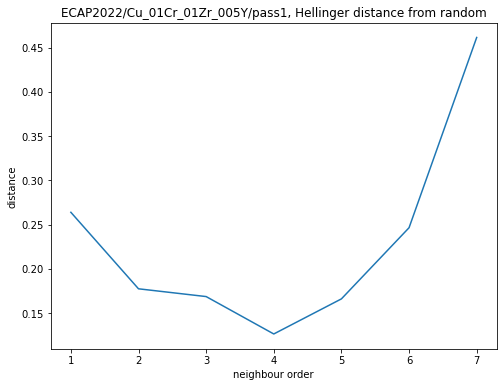

In [167]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass4

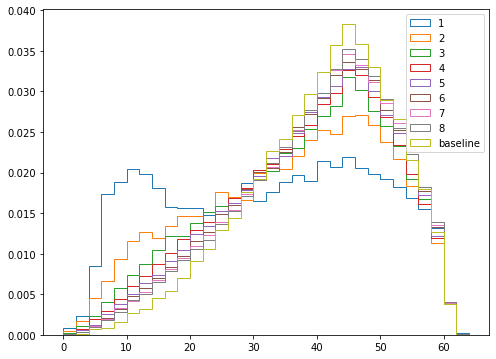

In [173]:
title = 'ECAP2022/Cu_01Cr_01Zr_005Y/pass4'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr_005Y\\Neper_Cu_01Cr_01Zr_005Y\pass4\disangles'

max_order = 8

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [174]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 11578 0.0 True
2 25545 0.0 True
3 41685 0.0 True
4 58967 0.0 True
5 76756 0.0 True
6 94680 0.0 True
7 112273 0.0 True
8 129138 0.0 True


In [175]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance4 = distance

1 0.257
2 0.163
3 0.113
4 0.087
5 0.069
6 0.057
7 0.05
8 0.044


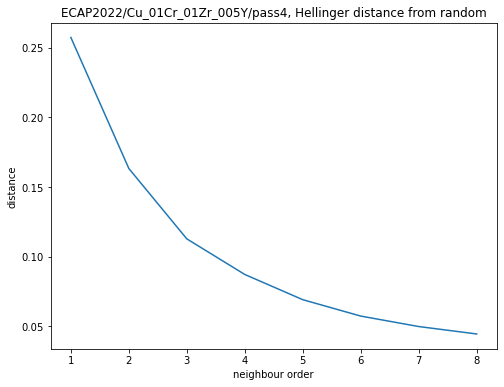

In [176]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass8

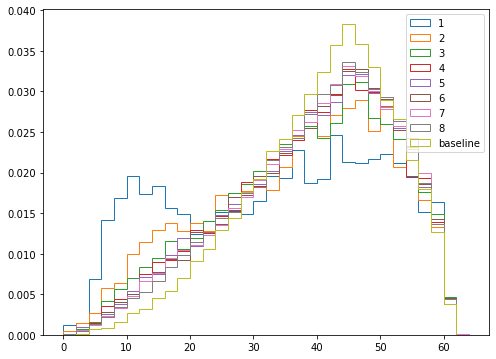

In [177]:
title = 'ECAP2022/Cu_01Cr_01Zr_005Y/pass8'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr_005Y\\Neper_Cu_01Cr_01Zr_005Y\pass8\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [178]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 2786 0.0 True
2 6006 0.0 True
3 9559 0.0 True
4 13053 0.0 True
5 16301 0.0 True
6 19190 0.0 True
7 21731 0.0 True
8 23857 0.0 True


In [179]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance8 = distance

1 0.236
2 0.143
3 0.106
4 0.084
5 0.079
6 0.073
7 0.066
8 0.058


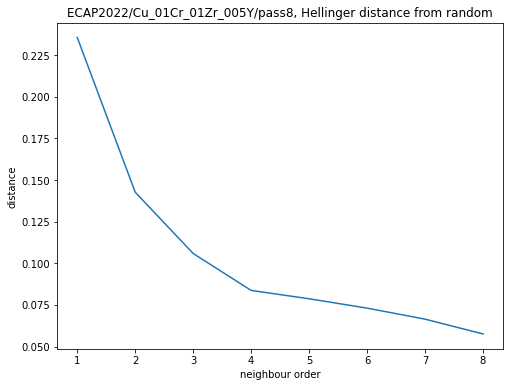

In [180]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

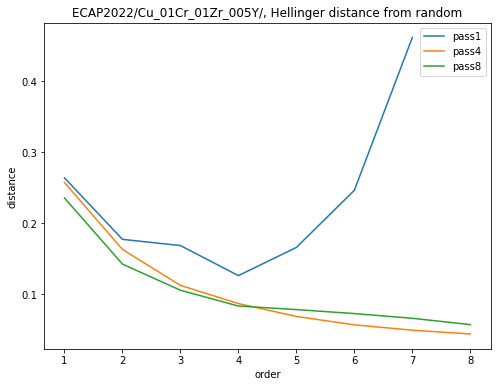

In [182]:
plt.plot(x[:-1], distance1, label='pass1')
plt.plot(x, distance4, label='pass4')
plt.plot(x, distance8, label='pass8')
plt.title('ECAP2022/Cu_01Cr_01Zr_005Y/' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

## ECAP2022\Cu_03Cr_05Zr

### pass1

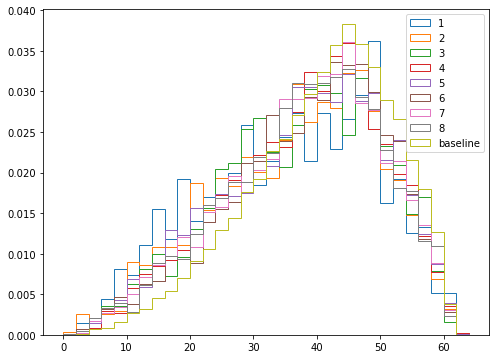

In [183]:
title = 'ECAP2022\Cu_03Cr_05Zr/pass1'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_03Cr_05Zr\\Neper_Cu_03Cr_05Zr\pass1\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [184]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 676 0.0 True
2 1393 0.0 True
3 2148 0.0 True
4 2783 0.0 True
5 3225 0.0 True
6 3519 0.0 True
7 3592 0.0 True
8 3446 0.0 True


In [185]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance1 = distance

1 0.167
2 0.13
3 0.116
4 0.093
5 0.1
6 0.085
7 0.091
8 0.094


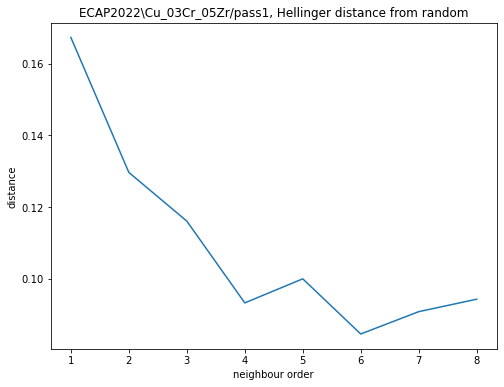

In [186]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass4

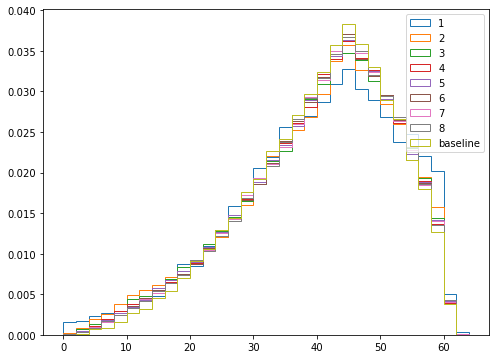

In [187]:
title = 'ECAP2022\Cu_03Cr_05Zr/pass4'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_03Cr_05Zr\\Neper_Cu_03Cr_05Zr\pass4\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [188]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 15160 0.0 True
2 33979 0.0 True
3 56510 0.0 True
4 80758 0.0 True
5 105285 0.0 True
6 129702 7.771561172376096e-16 True
7 153604 2.866595849582154e-13 True
8 177354 2.432498646953718e-13 True


In [189]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance4 = distance

1 0.081
2 0.058
3 0.043
4 0.035
5 0.032
6 0.029
7 0.027
8 0.027


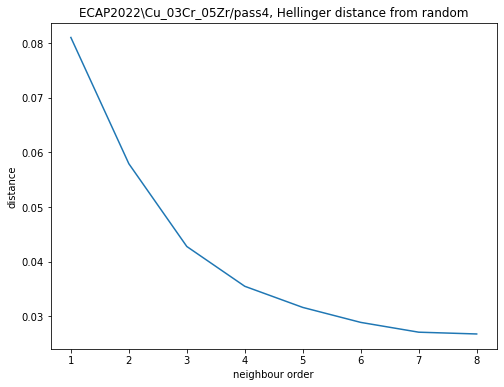

In [190]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

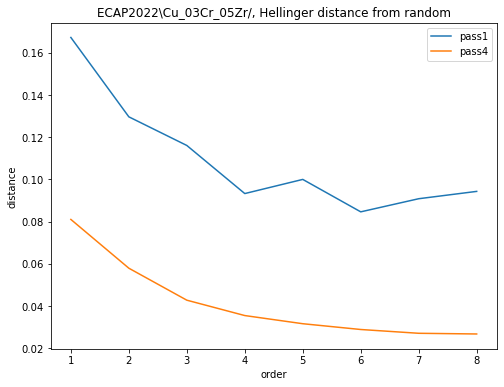

In [191]:
plt.plot(x, distance1, label='pass1')
plt.plot(x, distance4, label='pass4')
plt.title('ECAP2022\Cu_03Cr_05Zr/' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

## ECAP2022\Cu_Mg_high_temperature_ECAP

### pass1

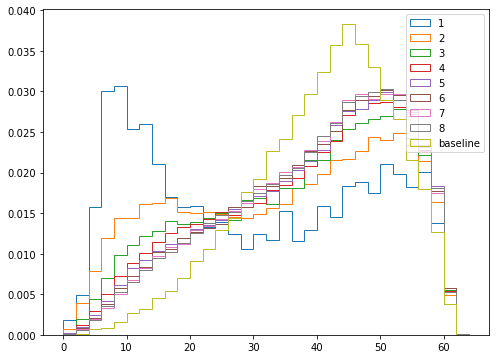

In [200]:
title = 'ECAP2022\Cu_Mg_high_temperature_ECAP/pass1'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_Mg_high_temperature_ECAP\\Neper_Cu-Mg\pass1\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [201]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 8763 0.0 True
2 19015 0.0 True
3 30528 0.0 True
4 42491 0.0 True
5 54558 0.0 True
6 66526 0.0 True
7 77865 0.0 True
8 88653 0.0 True


In [202]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance1 = distance

1 0.343
2 0.228
3 0.172
4 0.146
5 0.13
6 0.12
7 0.112
8 0.111


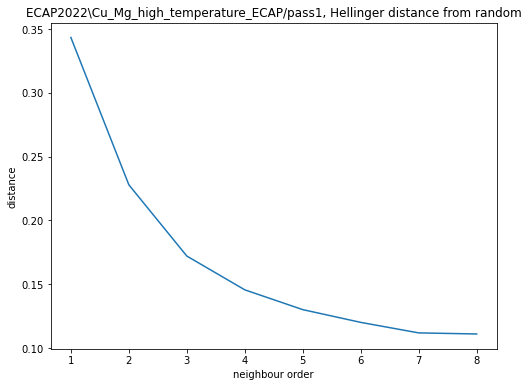

In [203]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass2

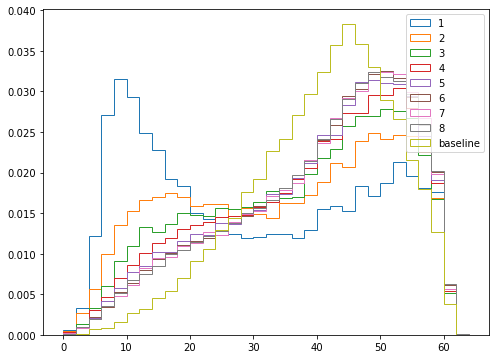

In [204]:
title = 'ECAP2022\Cu_Mg_high_temperature_ECAP/pass2'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_Mg_high_temperature_ECAP\\Neper_Cu-Mg\pass2\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [205]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 6146 0.0 True
2 13441 0.0 True
3 21845 0.0 True
4 30628 0.0 True
5 39762 0.0 True
6 48622 0.0 True
7 57085 0.0 True
8 65165 0.0 True


In [206]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance2 = distance

1 0.343
2 0.227
3 0.17
4 0.145
5 0.127
6 0.121
7 0.12
8 0.118


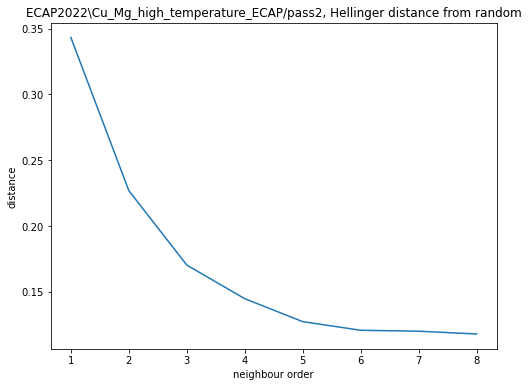

In [207]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass4

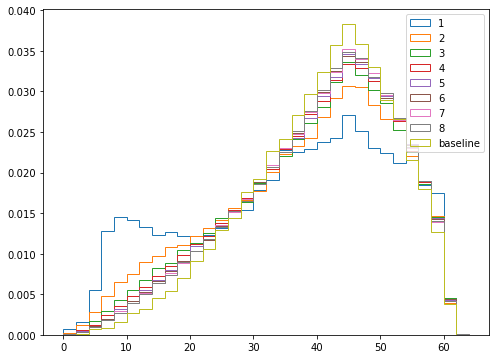

In [208]:
title = 'ECAP2022\Cu_Mg_high_temperature_ECAP/pass4'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_Mg_high_temperature_ECAP\\Neper_Cu-Mg\pass4\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [209]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 40882 0.0 True
2 90591 0.0 True
3 148188 0.0 True
4 209445 0.0 True
5 273174 0.0 True
6 337593 0.0 True
7 402340 0.0 True
8 467386 0.0 True


In [210]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance4 = distance

1 0.191
2 0.111
3 0.075
4 0.061
5 0.052
6 0.048
7 0.044
8 0.043


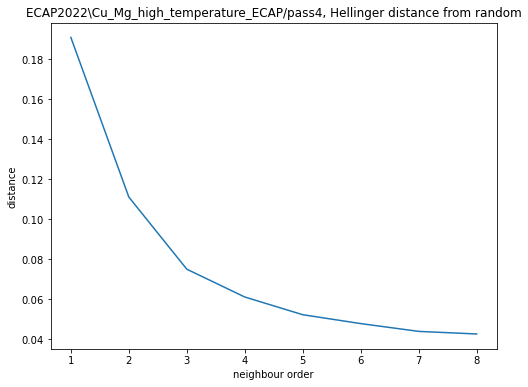

In [211]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass8

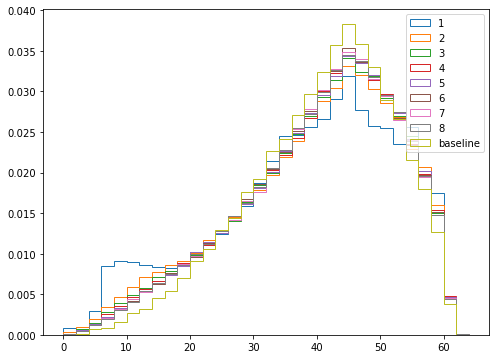

In [212]:
title = 'ECAP2022\Cu_Mg_high_temperature_ECAP/pass8'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_Mg_high_temperature_ECAP\\Neper_Cu-Mg\pass8\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [213]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 29210 0.0 True
2 64435 0.0 True
3 104373 0.0 True
4 146058 0.0 True
5 188023 0.0 True
6 229634 0.0 True
7 270582 0.0 True
8 310770 0.0 True


In [214]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance8 = distance

1 0.127
2 0.081
3 0.063
4 0.057
5 0.053
6 0.048
7 0.049
8 0.048


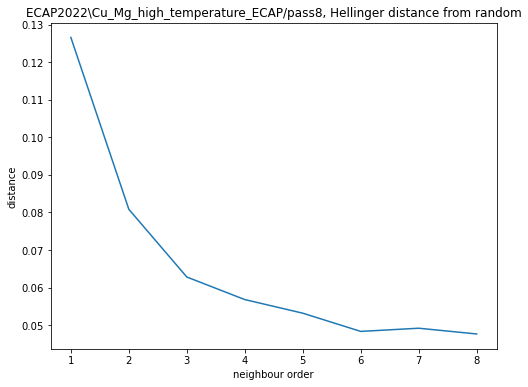

In [215]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

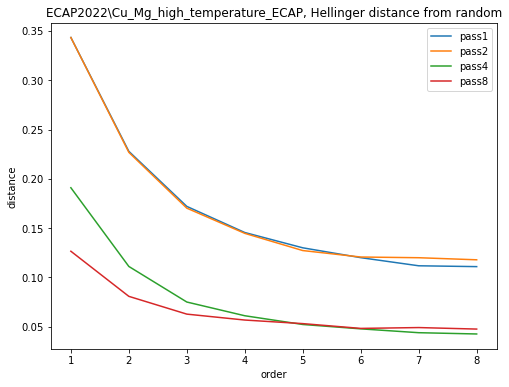

In [217]:
plt.plot(x, distance1, label='pass1')
plt.plot(x, distance2, label='pass2')
plt.plot(x, distance4, label='pass4')
plt.plot(x, distance8, label='pass8')
plt.title('ECAP2022\Cu_Mg_high_temperature_ECAP' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

## HPT2022

### htp1.2

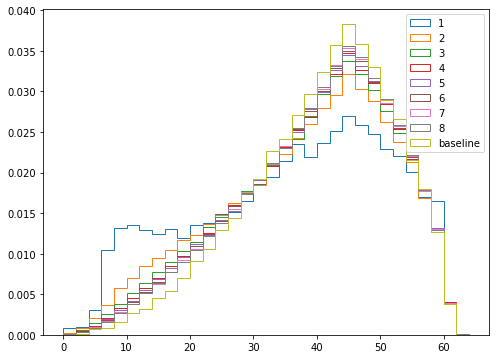

In [218]:
title = 'HPT2022/hpt1.2'
dirname = 'Experimental_Data2\Experimental_Data\HPT2022\HPT\\Neper_Cu_03Cr_05Zr\hpt1.2\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [219]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 73795 0.0 True
2 162222 0.0 True
3 262049 0.0 True
4 367494 0.0 True
5 474746 0.0 True
6 582835 0.0 True
7 690828 0.0 True
8 798176 0.0 True


In [220]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance1 = distance

1 0.177
2 0.1
3 0.067
4 0.055
5 0.05
6 0.045
7 0.042
8 0.04


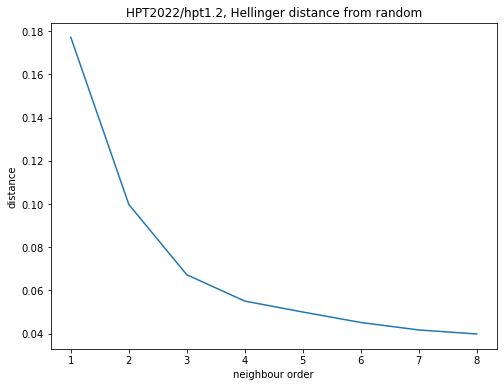

In [223]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### hpt3

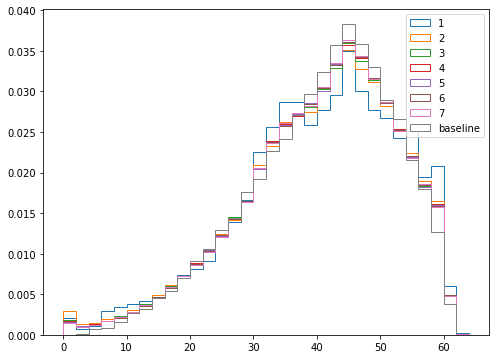

In [225]:
title = 'HPT2022/hpt3'
dirname = 'Experimental_Data2\Experimental_Data\HPT2022\HPT\\Neper_Cu_03Cr_05Zr\hpt3\disangles'

max_order = 7

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [226]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 102851 0.0 True
2 225697 0.0 True
3 364050 0.0 True
4 510261 0.0 True
5 659600 0.0 True
6 810239 0.0 True
7 961060 0.0 True


In [227]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance3 = distance

1 0.084
2 0.07
3 0.057
4 0.055
5 0.054
6 0.052
7 0.051


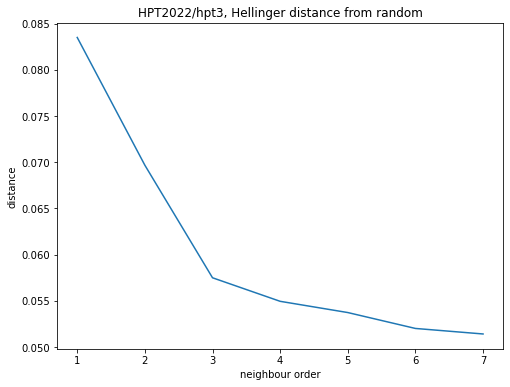

In [228]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

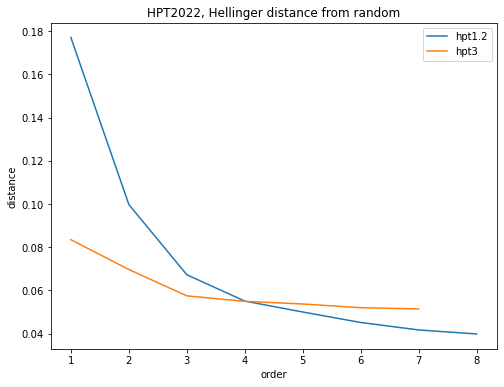

In [232]:
plt.plot(x + [8], distance1, label='hpt1.2')
plt.plot(x, distance3, label='hpt3')
plt.title('HPT2022' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()